In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sys

In [15]:
sys.path.append('C:/Users/lisah/Documents/Repos/ma-code')

In [ ]:
def get_a_from_index(a_ind): 
    """
    helper function for ll. Converts index of alpha to actual alpha value (alp_ind is number of alpha value)

    Args:
        a_ind (int): index of parameter a to be considered (must be between 1 and 5)

    Returns:
        actual value for parameter a
    """
    a = [0.1, 0.9, 1.1, 1.3, 1.7] # actual a values we have data for
    return a[a_ind-1]

def get_ic_from_index(ics_ind):
    """
    helper function for ll. Converts index of ic to actual ic value (ics_ind is number of ic value)

    Args:
        a_ind (int): index of parameter a to be considered (must be between 1 and 5)

    Returns:
        actual value for parameter a
    """
    ics= [0.2, 0.4, 1.0, 1.3, 2.3] # actual ic values we have data for
    return ics[ics_ind-1]

def read_ll_file(w0, n0, a, m, M, noise, path_to_file):
    """
    read in the ll file stored in a specific format.
    """
    name = "ll"+"_"+str(w0)+"_"+str(n0)+"_"+str(a)+"_"+str(m)+"_"+str(M)+"_"+str(noise)
    ending=".csv"
    csv = np.genfromtxt (path_to_file+name+ending, skip_header=1, delimiter=",")
    return csv

"""create plot of the bifurcation diagram
"""
def bif_plot(ax, m):
    a_vals = np.linspace(2*m, 2, 400)
    n_plus = [n(a, m, True) for a in a_vals]
    n_minus = [n(a, m, False) for a in a_vals]

    ax.plot(a_vals, np.real(n_plus), color='blue',linewidth=2)
    ax.plot(a_vals, np.real(n_minus), color='blue', linestyle="--",linewidth=2)
    ax.plot(2*m, 1, marker='o', color='blue', markersize=6)
    ax.set_ylim(0, 4)
    ax.axhline(y=0, color='blue', linewidth=4)
    ax.set_xlabel('Water Input a')
    ax.set_ylabel('Biomass n')
    ax.grid(True)
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)

"""eval the biomass n equilibria in dependece of a,m (see bifurcation plot)
"""
def n(a,m,plus: bool):

    sqrt_term = np.sqrt(a**2 - 4 * m**2)

    if plus:
        return (a + sqrt_term) / (2 * m)
    else:
        return (a - sqrt_term) / (2 * m)

In [19]:
def make_ll_plot(fig,ax,csv,ind, sparse, noisy):
    """
    make single ll plot for index combination ind
    """

    a = get_a_from_index(ind[0])
    n0 = get_ic_from_index(ind[1])
    
    # points at which ll data is evaluated
    a_x_ticks = np.arange(0.0, 2.1, 0.1)
    n0_y_ticks = np.arange(0.0, 4.1, 0.1)

    # all values below -1000 are mapped to -1000
    if sparse:
        levels = np.linspace(-50, 0, 150)
    elif noisy:
        levels = np.linspace(math.ceil(np.min(csv)),  0, 150)
    else:
        levels = np.linspace(-2000, 0, 150)

    # mark true prm combination
    plt.plot([a],[n0],marker="x",label="Truth",color="white",markersize=12,markerfacecolor='gold',markeredgewidth=2.0, markeredgecolor="gold", zorder=10)
    
    ax.grid(color='grey', linestyle='-',alpha=0.1, linewidth=1)
    ax.set_facecolor('white')
    countouring=ax.contourf(a_x_ticks, n0_y_ticks, csv,30,cmap='Reds',alpha=0.9,levels=levels)
    ax.set_yticks(n0_y_ticks[::4])
    ax.set_xticks(a_x_ticks[::4])
    plt.xlabel("α")
    plt.ylabel("IC")
    cbar = fig.colorbar(countouring, fraction=0.09)
    cbar.ax.set_ylabel('Log-Likelihood')
    if sparse:
        cbar.set_ticks([-50,0])
    elif noisy:
        cbar.set_ticks([math.ceil(np.min(csv)),0])
    else:
        cbar.set_ticks([-2000, -1000, 0])
    return countouring

In [41]:
index_combos = [[1,2], [2,4], [3,5], [5,3], [4,1], [2,2]]
M_vals = [500]
noise_vals = [1.0]
m = 0.45 # fix for now as given by literature
w0 = 0.95 # mean(a_vals)
store = False
path_to_read= f"C:/Users/lisah/Documents/Repos/ma-code/data/t_fixed/t500/likelihood/"

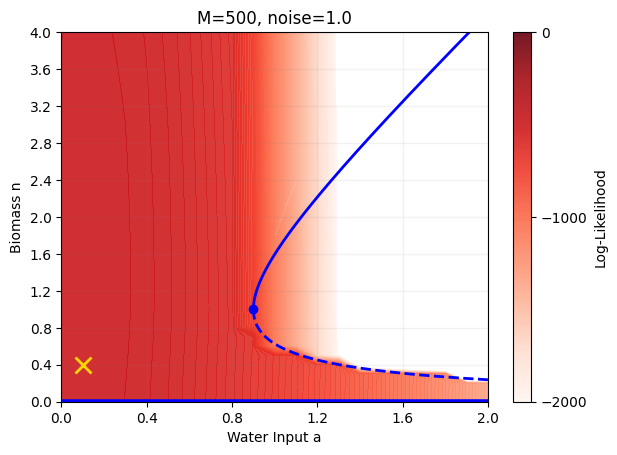

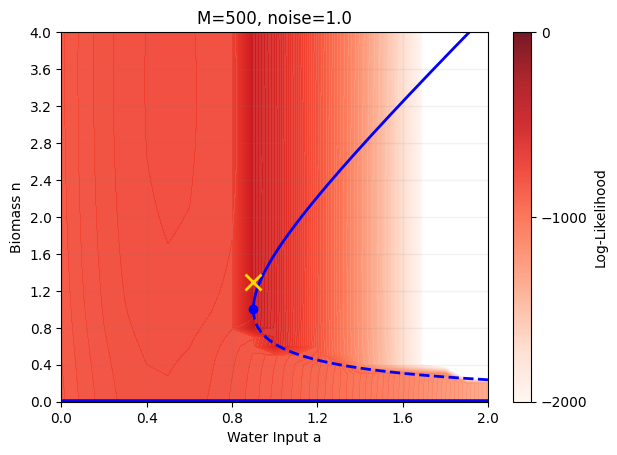

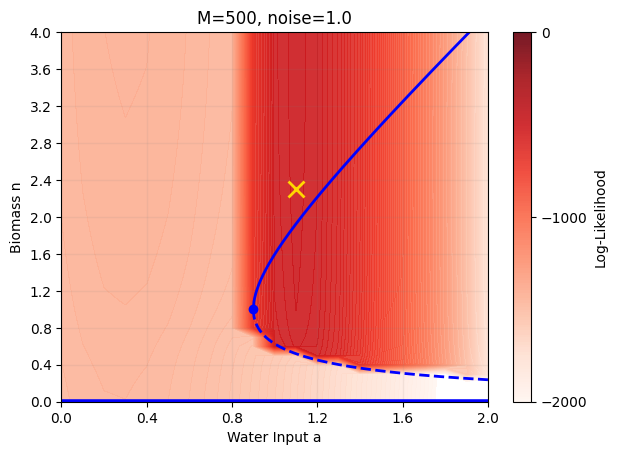

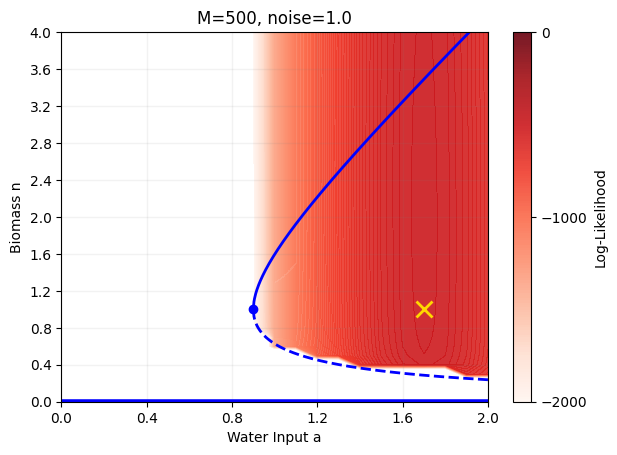

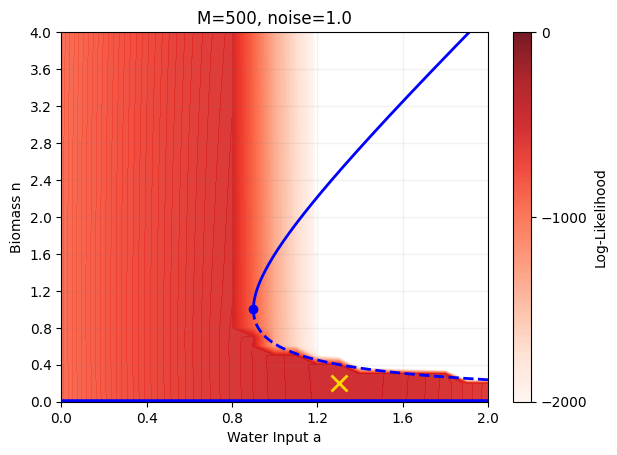

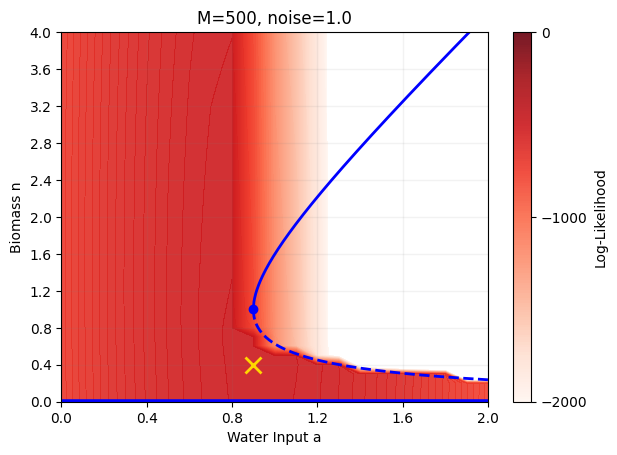

In [42]:
for ind in index_combos:
        for M in M_vals:
            for noise in noise_vals:

                '''if M <= 10:
                    sparse = True
                else:
                    sparse = False

                if noise >= 2.0:
                    noisy = True
                else:
                    noisy = False'''
                
                sparse = False
                noisy = False

                n0 = get_ic_from_index(ind[1])
                a = get_a_from_index(ind[0])

                csv = read_ll_file(w0,n0,a,m,M,noise,path_to_read)

                fig, ax = plt.subplots()
                make_ll_plot(fig, ax, csv, ind, sparse, noisy)
                ax.set_title(f"M={M}, noise={noise}")
                bif_plot(ax,m)

                #if store:
                 #   plt.savefig(f"{path_to_store}ll_{w0}_{n0}_{a}_{m}_{M}_{noise}.pdf", bbox_inches='tight')